# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [2]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows
print data.describe().round(0)

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185
        Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
count     440    440      440     440               440           440
mean    12000   5796     7951    3072              2881          1525
std     12647   7380     9503    4855              4768          2820
min         3     55        3      25                 3             3
25%      3128   1533     2153     742               257           408
50%      8504   3627     4756    1526               816           966
75%     16934   7190    10656    3554              3922          1820
max    112151  73498    

## Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

**Answer:**

**PCA**

The first PCA dimension might show a vector with high absolute values for fresh and milk. Fresh is the category that has the biggest standard deviation and range. Milk seem to be a category that might have a positive correlation with fresh, because customers (stores) that buy/sell more fresh product will likely also buy/sell more milk. So in combination, fresh, and milk might be the dimension that accounts for the most variance in the data set. 

Another possibility for the first PCA dimension is a vector with high absolute values for grocery, frozen and detergents paper. These 3 categories also might be positively correlated with each other, meaning that stores that buy/sell more grocery will also buy/sell more frozen and detergent paper products. So in combination, grocery, frozen and detergents paper might be the dimension that accounts for the most variance in the data set. 

** ICA **

Because ICA reveals the independent source underlying the data, ICA will show independent signals that are constructed from linear combination of the purchase amount for each category (observed data). These independent signals can be interpreted as different type of customers that buy certain category of product with a certain proportion. For example we might get 2 ICA components like: 

```
s1 = [0.8, 0.4, 0.1, 0.1, 0.1, 0.1]
s2 = [0.2, 0.2, 0.5, 0.4, 0.2, 0.2]
```

The first signal can be interpreted as type of customer that buys and sells fresh product and milk. The second signal can be interpreted another type of customer that buys and sells mostly grocery and frozen product, and other categories about equally. For example grocery store like Kroger or Safeway.


### PCA

In [3]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(data)

# Print the components and the amount of variance in the data contained in each dimension
print pca.components_
print pca.explained_variance_ratio_

[[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]
 [-0.17855726  0.50988675 -0.27578088  0.71420037 -0.20440987  0.28321747]
 [-0.04187648 -0.64564047  0.37546049  0.64629232  0.14938013 -0.02039579]
 [ 0.015986    0.20323566 -0.1602915   0.22018612  0.20793016 -0.91707659]
 [-0.01576316  0.03349187  0.41093894 -0.01328898 -0.87128428 -0.26541687]]
[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]


**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

**Answer:** Looking at the explained variance ratio, after the first 2 primary components, the variance drop off significantly. Based on this result, I would choose 2 dimensions for analysis, because the remaining dimensions' variance is small enough that there would be little information lost by removing them.

**3)** What do the dimensions seem to represent? How can you use this information?

**Answer:** 
The 1st primary component is a vector with a lot of weight on the Fresh category (-0.98), followed by Frozen (-0.15) and Milk (-0.12). Because frozen and milk value is relatively small compare to the fresh category, this component seem to be driven mostly by the fresh category, and it accounts for most of the variance in the data. 
The 2nd primary component is a vector with the biggest value on Grocery (0.76), Milk (0.52) and Detergents paper (0.37). This indicates that there is a pretty strong correlation between Grocery, Milk and Detergents paper. The combination of these 3 features made up most of the remaining variance of the data.

We can use this information to see what original features contribute to most of the variance in the data. These 2 principal components--that is a mix of fresh, and (grocery, milk, and detergents paper)--account for most of the variance in the data. So we can use these 2 principal components as new features and project the data to reduce the number of features to analyze while still retaining most of the information from the original data. Reducing features will be useful in making calculation simpler and faster. 


### ICA

ICA Components:
[[-0.005 -0.002 -0.006 -0.003  0.002  0.051]
 [-0.004  0.017  0.114 -0.007 -0.134 -0.016]
 [-0.003  0.014 -0.061 -0.002  0.004  0.004]
 [-0.002 -0.073  0.055  0.002 -0.016  0.017]
 [ 0.011  0.001 -0.007 -0.054  0.003  0.017]
 [ 0.05  -0.006 -0.006 -0.003  0.01  -0.003]]


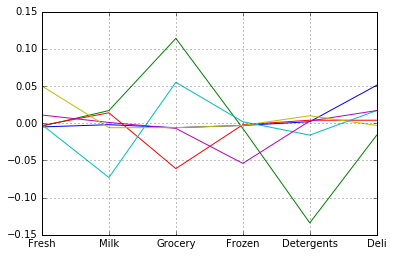

In [4]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
from sklearn import preprocessing

# data_centered = preprocessing.scale(data)
scaler = preprocessing.StandardScaler()
data_centered = scaler.fit_transform(data)

# print "data centered around origin:"
# print data_centered[0:5]
# data_centered = pd.DataFrame(data_centered, columns=('Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents', 'Deli'))
# print data_centered.mean()

ica = FastICA(n_components=6, random_state=1)
ica.fit(data_centered)

# Print the independent components
# Note: rounded down to 3 decimal places for more readability
rounded_ica_components = ica.components_.round(3)
# sort by the first element in the component
sorted_ica_components = rounded_ica_components[np.argsort(rounded_ica_components[:, 0])]
print "ICA Components:"
print sorted_ica_components

columns = ('Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents', 'Deli')
pd.DataFrame(sorted_ica_components.T, index=columns).plot(legend=False, grid=True)


In [5]:
S = np.dot(ica.components_, data_centered.T).T
S = scaler.inverse_transform(S)
# print data.head(100)
# print S[0:100]

# row = 95
# print data.iloc[row]
# print S[row]
# print data.iloc[row].sum()
# print S[row].sum()

# S is the source signal after applying the unmixing matrix to original data and scaling it back 
S = pd.DataFrame(S, columns=(1,2,3,4,5,6))
print "** Reconstructed sources stats **"
print S.describe().round(2)
print "** Original observation stats **"
print data.describe().round(2)

** Reconstructed sources stats **
              1        2        3        4        5        6
count    440.00   440.00   440.00   440.00   440.00   440.00
mean   12000.30  5796.27  7951.28  3071.93  2881.49  1524.87
std      602.94   351.85   453.05   231.44   227.30   134.44
min     8549.75  5311.48  2201.52   214.01  2677.24   295.72
25%    11791.59  5556.84  7903.40  3035.71  2799.85  1494.01
50%    11993.73  5700.57  8060.67  3110.72  2838.87  1564.34
75%    12211.95  5935.40  8144.00  3159.77  2906.79  1603.63
max    16444.47  8442.86  8641.58  4204.49  6670.89  1715.49
** Original observation stats **
           Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
count     440.00    440.00    440.00    440.00            440.00        440.00
mean    12000.30   5796.27   7951.28   3071.93           2881.49       1524.87
std     12647.33   7380.38   9503.16   4854.67           4767.85       2820.11
min         3.00     55.00      3.00     25.00              3.00    

**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

**Answer:**

Each vector in the ICA decomposition represent some latent variables (sources) that is composed of linear combination of the observed features (fresh, milk, groceries, etc). 

```
      Fresh  Milk   Groc   Froz   Det    Deli
1st [-0.005 -0.002 -0.006 -0.003  0.002  0.051]
2nd [-0.004  0.017  0.114 -0.007 -0.134 -0.016]
3rd [-0.003  0.014 -0.061 -0.002  0.004  0.004]
4th [-0.002 -0.073  0.055  0.002 -0.016  0.017]
5th [ 0.011  0.001 -0.007 -0.054  0.003  0.017]
6th [ 0.05  -0.006 -0.006 -0.003  0.01  -0.003]
```

ICA can be used to transforms the data about spending on the observed categories--such as Fresh, Milk, etc--into spending on certain combination of products that migh be influenced by the type of customer. It's interesting that when we reconstructed the source from the observed data using the unmixing matrix ```ica.components_```, we get a data set that has exactly the same mean as the original data set, but with less standard deviation and smaller range (See "Reconstructed sources stats" vs "Original observation stats").


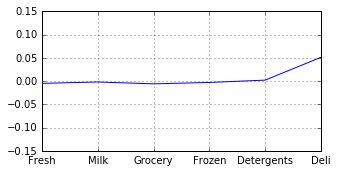

In [6]:
def plot_ica_component(i):
    pd.DataFrame(sorted_ica_components[i], index=columns).plot(legend=False, figsize=(5,2.5), grid=True, 
                                                           yticks=[-0.15, -0.10, -0.05, 0, 0.05, 0.10, 0.15])
plot_ica_component(0)

The 1st ICA component has a relatively large value for Deli (0.05) with other categories close to 0. This might indicate an independent signal from customers that buy/sell only deli stuff, such as cafe or sandwich shop.

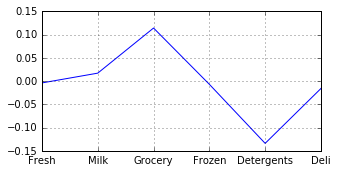

In [7]:
plot_ica_component(1)

The 2nd ICA component has a large value for Grocery (0.114), and a large negative value for Detergent (-0.134). This might indicate a source fom a customer type only buys/sells food with main focus in grocery food. 

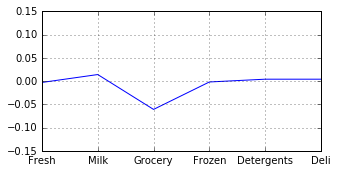

In [8]:
plot_ica_component(2)

The 3rd ICA component has a relatively large negative value for Grocery (-0.061), a little bit of Milk (0.014), and everything else close to 0. It seems like a customer type that buy/sell everything equally except much less grocery. It could be a restaurant.


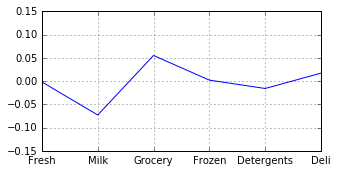

In [9]:
plot_ica_component(3)

The 4th ICA component has a large negative value for Milk (-0.073), a large value for Grocery (0.055), and small negative value for Detergent (-0.016) and small value for Deli (0.017). So it's a customer type that buys/sells more grocery but no milk. My best guess would be Asian grocery store. 

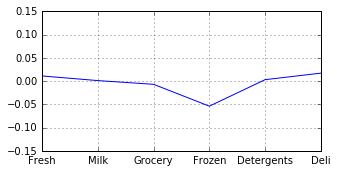

In [11]:
plot_ica_component(4)

The 5th ICA component has a relatively large negative value for Frozen, and about close to 0 for everything else. It could be a fresh produce store with a deli cafe. 

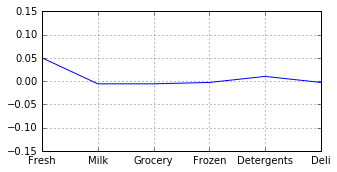

In [12]:
plot_ica_component(5)

The 6th ICA component has relatively large value for Fresh, and about close to 0 for everything else. This seems like a fresh produce store.

## Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

### Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: 
K Means is simple and fast clustering algorithm for large data set. However it does not always produce a consistent result (its result can be significantly different depending on the initialization state). It also performs poorly when there is significant density difference between the clusters, because the dense cluster pulls the center of less dense cluster (http://varianceexplained.org/r/kmeans-free-lunch/).

Gaussian Mixture Models has the advantage of having a soft classification feature, meaning that there can be grey area where the algortihm predicts some points as having close to 50/50 chance of being in one cluster or another. It uses probabilistic approcah so we can inquire the probability of a data point being in one cluster. 

For this purpose, even though both KMeans and GMM produce similar result and is fast enough for the data set, I chose GMM because it seems to fit the data better visually. 

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [13]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [14]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
pca = PCA(n_components=2)
pca.fit(data)
reduced_data = pca.transform(data)
print reduced_data[:10]  # print upto 10 elements

[[  -650.02212207   1585.51909007]
 [  4426.80497937   4042.45150884]
 [  4841.9987068    2578.762176  ]
 [  -990.34643689  -6279.80599663]
 [-10657.99873116  -2159.72581518]
 [  2765.96159271   -959.87072713]
 [   715.55089221  -2013.00226567]
 [  4474.58366697   1429.49697204]
 [  6712.09539718  -2205.90915598]
 [  4823.63435407  13480.55920489]]


In [48]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'

num_clusters = 3
km_clusters = KMeans(n_clusters=num_clusters)
gmm_clusters = GMM(n_components=num_clusters, covariance_type='full')
km_clusters.fit(reduced_data)
gmm_clusters.fit(reduced_data)
print km_clusters
print gmm_clusters

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)
GMM(covariance_type='full', init_params='wmc', min_covar=0.001,
  n_components=3, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0)


In [49]:
# Plot the decision boundary by building a mesh grid to populate a graph.
# print type(reduced_data)
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z_km = km_clusters.predict(np.c_[xx.ravel(), yy.ravel()])
Z_gmm = gmm_clusters.predict(np.c_[xx.ravel(), yy.ravel()])

In [50]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 

centroids_km = km_clusters.cluster_centers_
centroids_gmm = gmm_clusters.means_
print centroids_km
print centroids_gmm

[[-24220.71188261  -4364.45560022]
 [  1497.13461172  24998.27760147]
 [  4106.90273941  -3168.41202086]]
[[-16124.38278841  -5074.17173035]
 [  1718.61432297  19219.30845756]
 [  4460.37052071  -3349.57116377]]


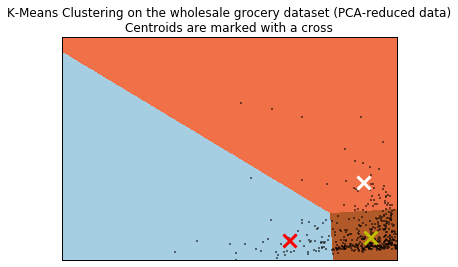

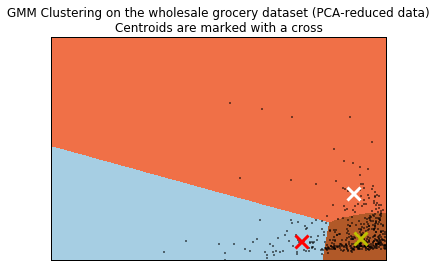

In [51]:
# Put the result into a color plot
def plot_cluster(Z, centroids, cltype):
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

    plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
    centroid_colors = ['r', 'w', 'y']
    for i in range(0, 3):
        plt.scatter(centroids[i, 0], centroids[i, 1],
                    marker='x', s=169, linewidths=3,
                    color=centroid_colors[i], zorder=10)

    plt.title('{} Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
              'Centroids are marked with a cross'.format(cltype))
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()
    
plot_cluster(Z_km, centroids_km, 'K-Means')
plot_cluster(Z_gmm, centroids_gmm, 'GMM')

**7)** What are the central objects in each cluster? Describe them as customers.

**Answer:**

The first cluster--which takes the lower left corner--is a group of customers that buys some fresh product and less grocery, milk, and detergents paper. These seems to be smaller family owned shops selling mostly fresh product.

The second cluster--which spans upper left to upper right corner--is a group of customers that buys more grocery, milk and detergents paper as well as fresh products. This group seems to be the larger grocery store like Safeway, or Kroger. There are less of these customers (maybe around 10%-15% of all customers), but their total purchase makes up a bigger proportion of the company revenue. 

The third cluster--which takes a small area on the lower right corner and accounts for majority of the customers and probably the majority of the company revenue--is a group of customers that buys more fresh product and less grocery, milk, and detergents paper. This group seems to be similar to the first group, but buys a little bit more fresh produce (a little larger in size). This 1st and 3rd group could be a store selling fresh product or a deli shop selling fresh food, sadwiches, etc.

### Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

**Answer:**

I feel PCA gave us the most insight into the data. First, it tells us that 95% of the variance in the data is accounted by the first 2 principal components. It also tells us that the first principal component accounts for  variance in fresh product, while the 2nd principal components accounts for variance in grocery, milk, and detergents paper. We also use PCA to reduce the data to 2 dimensions by projecting the data to the first 2 principal components. Having the data in 2 dimensions allows us to visualize the customer segments. 

**9)** How would you use that technique to help the company design new experiments?

**Answer:**

We can use PCA and clusering method to divide the customers into 2 or 3 segments. When the company designs new experiments, they could conduct A/B testing where the new experiment is implemented for half of the customers in each segments, while the other half continue without the new experiment. For each customer segment we measure the customer satisfaction or increase in revenue (order) and compare the result with the baseline group (without new new experiment). This way we can see if a change affects a customer segment positively or negatively. 

**10)** How would you use that data to help you predict future customer needs?

**Answer:**

We could use the data to label our existing customers into roughly 2 segments: smaller businesses buying mostly fresh product (which is the majority of the company's customer), and bigger stores buying fresh product, grocery, detergents paper, etc. We can implement a supervised learning model and train it using this existing data to predict which customer segment a new customer will fall into (after we have their purchasing data).

If we have a history of purchasing data (possbily broken down to months). We can analyze the purchasing pattern for each customer segment and create a regression model to predict how much a certain customer will spend in the next month, and what kind of product they will purchase, so the company can prepare for how much stock to keep in their warehouse. 
 